# Neural Network for Vehicle Control
This notebook models a neural network for controlling a vehicle, as described in the theoretical section of the lab work.


## Step 1: Set Up the Environment and Import Necessary Libraries


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


## Step 2: Create Training and Testing Datasets
We use the data from the provided CSV.


In [ ]:
data = np.array([
    [1.0, 1.0, 0.5, 0.6, 0.3],
    [0.0, 0.9, 0.8, 0.4, 0.5],
    [0.3, 0.3, 1.0, 0.5, 0.9],
    [0.1, 0.8, 0.2, 0.2, 0.1],
    [0.5, 0.6, 0.3, 0.7, 0.4],
    [0.7, 0.1, 0.9, 0.9, 0.2],
    [0.9, 0.5, 0.4, 0.3, 0.8],
    [0.2, 0.4, 0.6, 0.1, 0.0],
    [0.4, 0.7, 0.1, 0.8, 0.6],
    [0.6, 0.2, 0.7, 0.5, 0.7],
    [0.8, 0.3, 0.5, 0.6, 0.9],
    [0.5, 0.0, 0.3, 0.3, 0.5],
    [0.1, 0.9, 0.4, 0.4, 0.2],
    [0.3, 0.6, 0.2, 0.7, 0.3],
    [0.2, 0.8, 0.9, 0.9, 0.1],
    [1.0, 0.5, 0.0, 0.2, 0.0]
])

X = data[:, :3]
y = data[:, 3:]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 3: Define the Neural Network Architecture
We create a function to define the neural network model with customizable hidden layers and neurons.


In [ ]:
def create_model(hidden_layers, neurons_per_layer):
    model = Sequential()
    model.add(Dense(8, input_dim=3, activation='relu'))  # Input layer

    for _ in range(hidden_layers):
        model.add(Dense(neurons_per_layer, activation='relu'))  # Hidden layers

    model.add(Dense(2, activation='linear'))  # Output layer
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


## Step 4: Train the Neural Network
We train the model on the training data.


In [ ]:
hidden_layers = 2
neurons_per_layer = 8
model = create_model(hidden_layers, neurons_per_layer)

history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)


## Step 5: Evaluate the Neural Network Performance
We evaluate the model on the test data to determine its performance.


In [ ]:
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss}, Test MAE: {mae}')


Test Loss: 0.0659019723534584, Test MAE: 0.2015974521636963


## Step 6: Experiment with Different Architectures
We experiment with different numbers of hidden layers and neurons to observe their impact on performance.


In [ ]:
hidden_layers_list = [1, 2, 3]
neurons_list = [4, 8, 16]

results = []

for hidden_layers in hidden_layers_list:
    for neurons in neurons_list:
        model = create_model(hidden_layers, neurons)
        history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)
        loss, mae = model.evaluate(X_test, y_test, verbose=0)
        results.append((hidden_layers, neurons, loss, mae))

for result in results:
    print(f'Hidden Layers: {result[0]}, Neurons: {result[1]}, Test Loss: {result[2]}, Test MAE: {result[3]}')


Hidden Layers: 1, Neurons: 4, Test Loss: 0.137106254696846, Test MAE: 0.3099939227104187
Hidden Layers: 1, Neurons: 8, Test Loss: 0.23310017585754395, Test MAE: 0.4165080487728119
Hidden Layers: 1, Neurons: 16, Test Loss: 0.07700131833553314, Test MAE: 0.21318131685256958
Hidden Layers: 2, Neurons: 4, Test Loss: 0.06400203704833984, Test MAE: 0.23684245347976685
Hidden Layers: 2, Neurons: 8, Test Loss: 0.1696239560842514, Test MAE: 0.33767884969711304
Hidden Layers: 2, Neurons: 16, Test Loss: 0.10864293575286865, Test MAE: 0.2863701581954956
Hidden Layers: 3, Neurons: 4, Test Loss: 0.23155328631401062, Test MAE: 0.3912524878978729
Hidden Layers: 3, Neurons: 8, Test Loss: 0.1335442066192627, Test MAE: 0.30712053179740906
Hidden Layers: 3, Neurons: 16, Test Loss: 0.10497605055570602, Test MAE: 0.2684679329395294


## Step 7: Plot Training and Validation Loss
We plot the training and validation loss to visualize the training process.


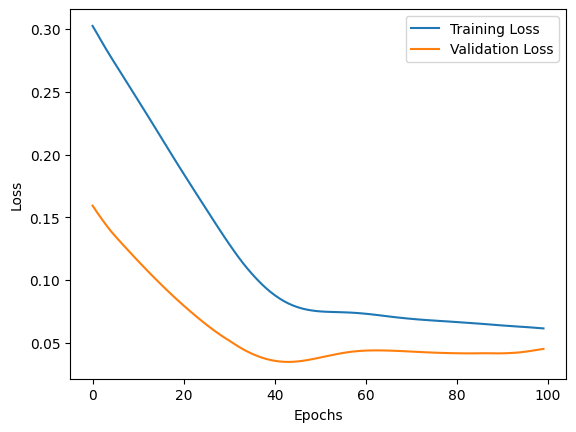

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Conclusions
- The number of hidden layers and neurons affects the performance of the neural network.
- More hidden layers and neurons can improve accuracy but may also increase training time.
- It's important to find a balance between model complexity and computational efficiency.
